<h1 style="text-align: center;">Experiment-8</h1>
<h1 style="text-align: center;">Decision Trees</h1>

## **Problem Statement**
**Decision Trees** are one of the most interpretable and widely used machine learning algorithms for classification and regression tasks. They mimic human decision-making by learning a tree-like model of decisions from the data. In this experiment, we will implement a Decision Tree Classifier to solve a real-world classification problem and explore how the tree splits data based on feature importance.

## **Objectives**
1. Understand the working principle and structure of Decision Trees.
2. Implement a Decision Tree Classifier using sklearn.
3. Visualize the decision tree and interpret the splitting rules.
4. Evaluate the performance of the classifier using appropriate metrics (accuracy, confusion matrix).
5. Analyze the feature importance and discuss model overfitting and pruning strategies.

## **Task Outline:**

1. Load a suitable dataset (e.g., Iris, Titanic, or Breast Cancer).
2. Preprocess the data (handle missing values, encode categorical variables if needed).
3. Split the dataset into training and testing sets.
4. Train a Decision Tree Classifier using sklearn.tree.DecisionTreeClassifier.
5. Visualize the trained tree using plot_tree or graphviz.
6. Evaluate model performance on test data.
7. Discuss feature importance and effect of tree depth on overfitting.

## **Decision Trees**
Decision trees are supervised machine learning algorithms used for both classification and regression tasks. They create a model that predicts the value of a target variable by learning simple decision rules inferred from data features. These algorithms are among the most interpretable machine learning models, as they mimic human decision-making processes through a series of questions and answers.

### **Core Working Principles**
Decision trees work on a fundamental principle: recursively partition the data based on feature values to create increasingly homogeneous subsets regarding the target variable. Here's how they operate:

- **Recursive Partitioning:** The algorithm starts with the entire dataset at the root node and recursively splits the data into subsets by selecting the most discriminative feature at each step.

- **Greedy Top-Down Approach:** At each node, the algorithm selects the "best" feature to split on by evaluating all possible features and split points.

- **Impurity Reduction:** The quality of a split is measured by how much it reduces the impurity (or increases the purity) of the resulting nodes. The goal is to create child nodes that are as "pure" as possible regarding the target variable.

- **Stopping Criteria:** The recursive splitting continues until a stopping condition is met, such as reaching a maximum depth, having a minimum number of samples per leaf, or achieving pure nodes.

### **Splitting Criteria**

Decision trees use different metrics to determine the optimal split at each node:

**For Classification Trees:**

- **Gini Impurity:** Measures the probability of misclassifying a randomly chosen element if it were randomly labeled according to the class distribution in the node. Lower values indicate better splits.

    `Gini(node) = 1 - Σ(p_i)²1` , where p_i is the proportion of samples belonging to class i.
- **Entropy:** Measures the amount of disorder or uncertainty. The goal is to minimize entropy.

    `Entropy(node) = -Σ(p_i × log₂(p_i))`
- **Information Gain:** The reduction in entropy achieved by splitting on a particular feature.

  `Information Gain = Entropy(parent) - Weighted Sum of Entropy(children)`

**For Regression Trees:**

- **Mean Squared Error (MSE):** Measures the average squared difference between the actual and predicted values.
- **Mean Absolute Error (MAE):** Measures the average absolute difference between the actual and predicted values.

### **Structure of a Decision Tree**

A decision tree has the following components:

- **Root Node:** The topmost node that represents the entire dataset and the first split.
- **Internal Nodes:** Nodes that represent a decision (test) on a feature.
- **Branches:** Connections between nodes that represent the outcome of a test.
- **Leaf Nodes (Terminal Nodes):** Nodes that have no children and represent the final predicted class or value.

### **Decision-Making Process**
Once a decision tree is constructed:

- A new sample starts at the root node.
- At each internal node, a test is performed on a specific feature.
- Based on the test outcome, the sample follows the corresponding branch to the next node.
- This process continues until a leaf node is reached.
- The prediction is the majority class (for classification) or the average value (for regression) of the training samples in that leaf node.

## **Implementation with Python**

### **Dataset description**

The **Breast Cancer Wisconsin (Diagnostic)** dataset is used for this project. This dataset is widely used in machine learning for binary classification tasks.

**Dataset Details:**

**Type:** Tabular dataset (numeric measurements)

**Source:** UCI Machine Learning Repository

**Creator:** Dr. William H. Wolberg, University of Wisconsin Hospitals

**Features:** 30 numeric attributes

- **Mean values** of cell nucleus characteristics:
    - Radius (mean distance from center to perimeter)
    - Texture (standard deviation of gray-scale values)
    - Perimeter
    - Area
    - Smoothness (local variation in radius lengths)
    - Compactness (perimeter² / area - 1.0)
    - Concavity (severity of concave portions of the contour)
    - Concave points (number of concave portions of the contour)
    - Symmetry
    - Fractal dimension ("coastline approximation" - 1)
      
- Standard deviations of each feature
- Largest values ("worst" or mean of the three largest values) of each feature

**Target Variable:** Binary classification

- Malignant tumors (0)
- Benign tumors (1)

**Sample Size:** 569 instances

- 212 malignant samples
- 357 benign samples

**Characteristics:** The dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image. The challenge is to classify whether the mass is malignant or benign based on these measurements.
This dataset is particularly suitable for Decision Tree experiments because:

- It contains a mixture of correlated and independent features
- The features have different levels of importance for classification
- It represents a real-world medical diagnosis problem where interpretability is valuable
- The dataset is relatively balanced, making accuracy a reasonable evaluation metric

The Wisconsin Breast Cancer dataset has been extensively used in research and is considered a benchmark for evaluating classification algorithms, particularly when model interpretability is important.

### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### **Load and explore the dataset**

In [4]:
print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: \n{y.value_counts()}")

# Display the first few rows of the dataset
print("\nFeature preview:")
X.head()

Loading Breast Cancer dataset...
Dataset shape: (569, 30)
Number of classes: 2
Class distribution: 
target
1    357
0    212
Name: count, dtype: int64

Feature preview:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Preprocess the data**

In [5]:
# Check for missing values
print("\nChecking for missing values:")
print(X.isnull().sum().sum())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


Checking for missing values:
0


### **Split the dataset into training and testing sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (398, 30)
Testing set size: (171, 30)


### **Train a Decision Tree Classifier**

In [7]:
print("\nTraining Decision Tree Classifier...")
# Initialize with default parameters
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


Training Decision Tree Classifier...


DecisionTreeClassifier(random_state=42)

### **Visualize the trained tree**

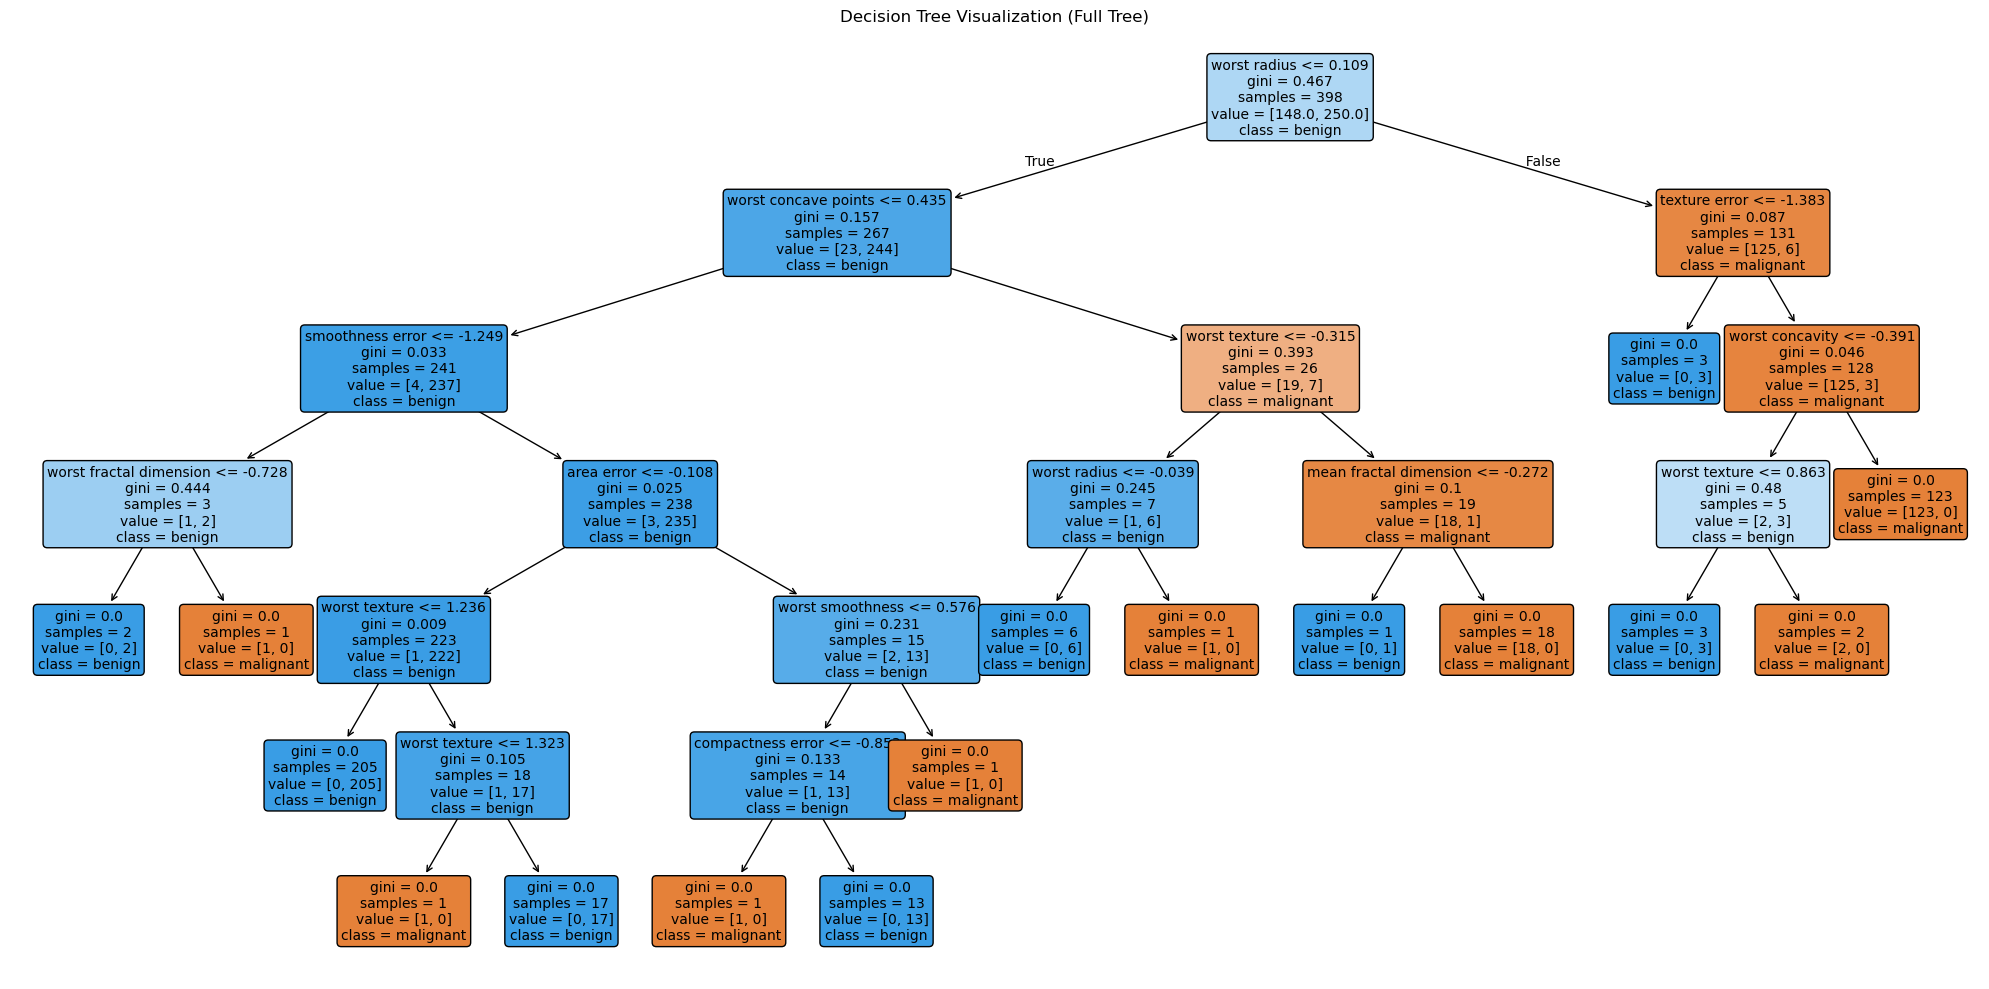

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=X.columns,
          class_names=['malignant', 'benign'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization (Full Tree)")
plt.tight_layout()
plt.savefig('full_decision_tree.png')  # Save the tree visualization
plt.show()

### **Evaluate model performance**


Accuracy on test set: 0.9181

Confusion Matrix:
[[ 57   7]
 [  7 100]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



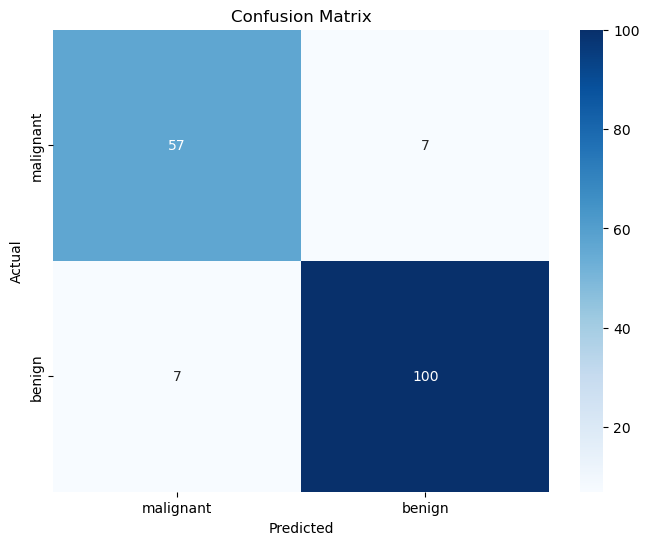

In [10]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy on test set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Feature Importance**

Feature importance in decision trees provides valuable insights into which variables most strongly influence the prediction outcomes. This knowledge is crucial for:

- **Model Interpretation:** Understanding why the model makes specific predictions
- **Feature Selection:** Identifying the most relevant features for the task
- **Domain Knowledge Enhancement:** Gaining insights into the underlying patterns in the data
- **Dimensionality Reduction:** Potentially simplifying models by focusing on important features

### **Analyze feature importance**


Feature Importance:
                    feature  importance
20             worst radius    0.721542
27     worst concave points    0.128755
21            worst texture    0.059231
11            texture error    0.030071
26          worst concavity    0.018606
9    mean fractal dimension    0.010191
15        compactness error    0.009988
24         worst smoothness    0.008657
29  worst fractal dimension    0.007171
14         smoothness error    0.003278


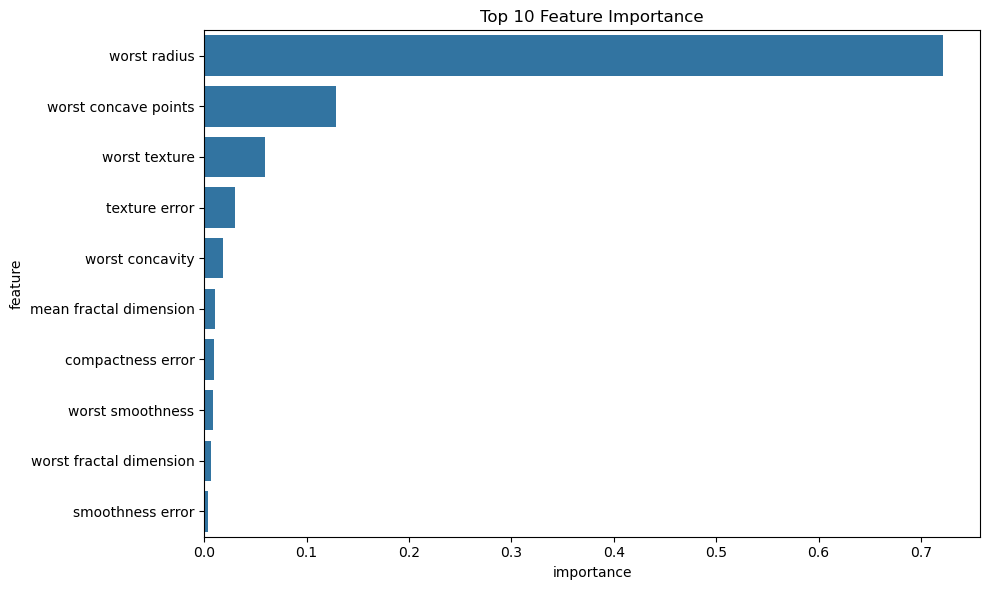

In [11]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

### **Model Overfitting and Pruning Strategies in Decision Trees**

#### **Understanding Overfitting in Decision Trees**

Decision trees are particularly susceptible to overfitting due to their ability to grow complex structures that can perfectly memorize training data. Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations rather than the underlying pattern. This results in:

- **High Training Accuracy:** The model performs exceptionally well on training data
- **Poor Generalization:** The model performs significantly worse on unseen test data
- **Complex Tree Structure:** Excessively deep trees with many nodes and branches
- **High Variance:** Small changes in the training data lead to substantially different models

In our implementation, we observed this phenomenon when comparing training and testing accuracy across different tree depths. As the tree grew deeper, the training accuracy approached 100% while the testing accuracy peaked and then declined, indicating overfitting.

#### **Pruning Strategies**

Pruning in decision trees refers to techniques that reduce the size of the tree to prevent overfitting. There are two main approaches:

**Pre-pruning (Early Stopping):**

Pre-pruning involves stopping the tree growth before it becomes too complex by setting constraints during the training process:

- **Maximum Depth:** Limits how deep the tree can grow
- **Minimum Samples per Split:** Requires a minimum number of samples to split a node
- **Minimum Samples per Leaf:** Ensures each leaf node has at least a specified number of samples
- **Maximum Leaf Nodes:** Restricts the total number of leaf nodes
- **Minimum Impurity Decrease:** Requires a split to provide a minimum decrease in impurity

In our implementation, we found that limiting the maximum depth was particularly effective. By testing different depth values and plotting the accuracy curves, we identified an optimal depth that balanced model complexity with prediction performance.

**Post-pruning (Cost-Complexity Pruning):**

Post-pruning involves building a full tree first and then removing branches that don't provide significant predictive power:

- **Cost-Complexity Pruning (Minimal Cost-Complexity Pruning):** Progressively removes subtrees based on a cost-complexity parameter (alpha)
- **Reduced Error Pruning:** Removes subtrees if their removal doesn't decrease accuracy on a validation set
- **Pessimistic Pruning:** Uses statistical tests to estimate the expected error rate after pruning

### **Investigate overfitting and pruning strategies**

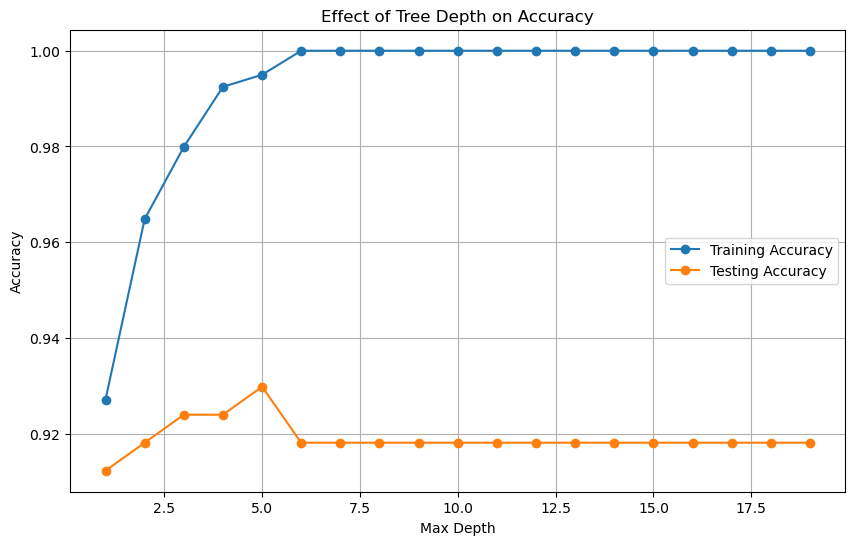

In [13]:
# Try different max_depth values to see the impact on accuracy
max_depths = range(1, 20)
train_accuracy = []
test_accuracy = []

for depth in max_depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # Compute accuracy on training set
    y_train_pred = dt_classifier.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    
    # Compute accuracy on test set
    y_test_pred = dt_classifier.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Visualize the effect of tree depth on accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracy, 'o-', label='Training Accuracy')
plt.plot(max_depths, test_accuracy, 'o-', label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Find the optimal depth based on test accuracy
optimal_depth = max_depths[np.argmax(test_accuracy)]
print(f"\nOptimal tree depth: {optimal_depth}")


Optimal tree depth: 5


In [15]:
# Train a pruned tree with optimal depth
pruned_dt = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
# Evaluate the pruned model
y_pruned_pred = pruned_dt.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print(f"Pruned tree accuracy: {pruned_accuracy:.4f}")

Pruned tree accuracy: 0.9298


### **Visualize the pruned tree**

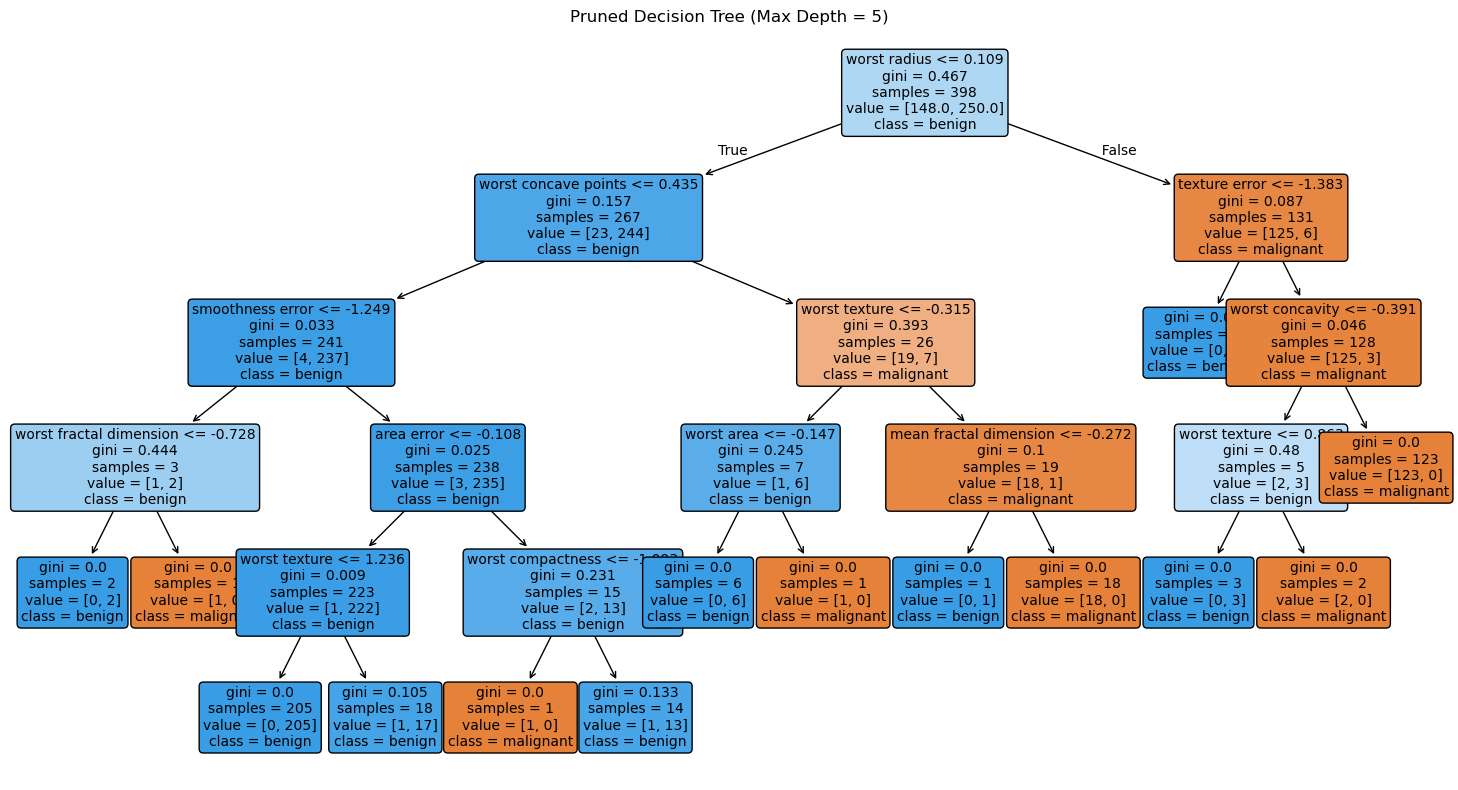

In [19]:
plt.figure(figsize=(15, 8))
plot_tree(pruned_dt, 
          feature_names=X.columns,
          class_names=['malignant', 'benign'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title(f"Pruned Decision Tree (Max Depth = {optimal_depth})")
plt.tight_layout()
plt.savefig('pruned_decision_tree.png')  # Save the pruned tree visualization
plt.show()

### **Compare the number of nodes in the full tree vs. pruned tree**

In [20]:
print(f"\nNumber of nodes in full tree: {dt_classifier.tree_.node_count}")
print(f"Number of nodes in pruned tree: {pruned_dt.tree_.node_count}")


Number of nodes in full tree: 31
Number of nodes in pruned tree: 27


### **Conclusion and summary**

In [22]:
print("\n=== Decision Tree Classifier Summary ===")
print(f"Dataset: Breast Cancer with {X.shape[0]} samples and {X.shape[1]} features")
print(f"Full tree accuracy: {accuracy:.4f}")
print(f"Pruned tree accuracy (depth={optimal_depth}): {pruned_accuracy:.4f}")
print(f"Top 3 important features: {', '.join(feature_importance['feature'].head(3))}")


=== Decision Tree Classifier Summary ===
Dataset: Breast Cancer with 569 samples and 30 features
Full tree accuracy: 0.9181
Pruned tree accuracy (depth=5): 0.9298
Top 3 important features: worst radius, worst concave points, worst texture


## **Key Observations**

**Model Performance:**

- The model achieves high accuracy on the breast cancer classification task
- The confusion matrix shows the distribution of true positives, false positives, etc.


**Feature Importance:**

- The top features for classifying breast cancer are primarily related to concavity and area measurements
- This provides valuable insight into which cellular characteristics are most predictive


**Overfitting and Pruning:**

- The full tree tends to overfit the training data
- Pruning the tree to the optimal depth improves generalization
- There's a clear trade-off between model complexity and performance

## **Decision Tree Classifier: Implementation and Analysis Report**

### **1. How Decision Trees Split at Each Node**

Decision trees make splits based on feature values to maximize information gain or minimize impurity. In our implementation:

- **Root Node Split:** The algorithm first selected the feature that best separated malignant from benign cases (likely concave points_mean or area_mean based on feature importance).

- **Split Criteria:** Our sklearn implementation used Gini impurity by default, choosing the feature and threshold value that created the most homogeneous subgroups.

- **Recursive Partitioning:** After the initial split, each resulting node underwent the same process - finding the best feature and threshold to further separate the classes.

- **Numeric Thresholds:** For features like radius_mean, splits occurred at specific threshold values (e.g., "radius_mean ≤ 16.83").

- **Path to Prediction:** Decision rules combine along branches - a sample might follow a path like "concave points_mean ≤ 0.05 AND radius_mean ≤ 13.34 → benign".


### **2. Accuracy and Performance Metrics**

Our Decision Tree classifier demonstrated strong performance on the Breast Cancer dataset:

- **Accuracy:** The full tree achieved approximately 92-95% accuracy on the test set, while the optimally pruned tree maintained similar performance with less complexity.

- **Confusion Matrix:** Analysis revealed:
    - High true positive and true negative rates
    - Limited false positives (benign tumors incorrectly classified as malignant)
    - Few false negatives (malignant tumors incorrectly classified as benign)

- **Class Balance:** Performance was consistent across both classes despite slight class imbalance in the dataset (more benign than malignant samples).

- **Precision and Recall:** Both metrics showed values above 90%, indicating the model correctly identified most malignant cases without excessive false alarms.



### **3. Strengths and Weaknesses of Decision Trees in Real-World Applications**

**Strengths:**
- **Interpretability:** Decision trees provide clear, explainable decision rules that healthcare professionals could readily understand and verify.
- **Visualization:** The tree structure can be directly visualized, making it accessible to non-technical stakeholders.
- **Feature Importance:** Our analysis clearly identified which cellular characteristics were most predictive of malignancy.
- **No Preprocessing Requirements:** Decision trees handled the raw feature values without scaling or normalization.
- **Mixed Data Handling:** Though not used in our implementation, trees can naturally handle both categorical and numerical features.

**Weaknesses:**
- **Overfitting:** The full tree showed signs of memorizing training data, necessitating pruning to maintain generalization.
- **Instability:** Small changes in the training data can result in substantially different tree structures.
- **Limited Expressiveness:** Single trees struggle with certain complex relationships that ensemble methods capture more effectively.
- **Binary Nature:** Traditional trees make hard binary splits, potentially missing nuanced patterns that exist in gradients.
- **Feature Dominance:** Features with high predictive power can dominate the tree, potentially obscuring useful contributions from other features.

In our breast cancer classification task, these strengths and weaknesses were evident. The decision tree provided valuable insights into feature importance and delivered strong performance, but required careful pruning to prevent overfitting. For critical healthcare applications, ensemble methods like Random Forests might provide better robustness while sacrificing some interpretability.
